## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('chronic_kidney_disease_full.csv')

In [3]:
df = data_raw.copy()

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:

In [4]:
# This is for me to understand what these columns mean
shorthand_to_longhand ={		
        'age':'age',
		'bp':'blood pressure',
		'sg':'specific gravity',
		'al':'albumin',
		'su':'sugar',
		'rbc':'red blood cells',
		'pc':'pus cell',
		'pcc':'pus cell clumps',
		'ba':'bacteria',
		'bgr':'blood glucose random',
		'bu':'blood urea',
		'sc':'serum creatinine',
		'sod':'sodium',
		'pot':'potassium',
		'hemo':'hemoglobin',
		'pcv':'packed cell volume',
		'wc':'white blood cell count',
		'rc':'red blood cell count',
		'htn':'hypertension',
		'dm':'diabetes mellitus',
		'cad':'coronary artery disease',
		'appet':'appetite',
		'pe':'pedal edema',
		'ane':'anemia',
}

In [5]:
df_verbose = df.rename(mapper=shorthand_to_longhand, axis=1)

In [6]:
# Seeing this verbose one is worse to do data analysius, but much easier to detect any trends I would want to see
df_verbose

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbcc,rbcc,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [7]:
df_verbose.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume', 'wbcc', 'rbcc',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'class'],
      dtype='object')

In [8]:
# From the paper by Parul Sinha

'''
You may develop complications like high
blood pressure, anemia (low blood count), weak bones, poor
nutritional health and nerve damage. 
''';

In [9]:
# Neat! Let's see what trends we need to look for 

In [10]:
# Initially, I want to separate the data based in class to compare the numerical and categeorical data between these two groups
# maybe we can identify some really telling factors right away

### Some Definitions and information I need because I am not a medical professional

### Specific Gravity
https://www.medicalnewstoday.com/articles/322125#:~:text=Low%20specific%20gravity%20suggests%20that,fluid%20due%20to%20increased%20thirst
##### SG refers to the SG in the urine
Low specific gravity suggests that urine is too diluted.

Conditions that cause low specific gravity include:

diabetes insipidus,
kidney failure,
drinking too much fluid due to increased thirst
damage to kidney tubular cells
---

### Albumin
https://medlineplus.gov/lab-tests/albumin-blood-test/
##### Low albumin levels can indicate a problem with your liver or kidneys.

---

### Pus Cell
https://www.medicalnewstoday.com/articles/249182#:~:text=Pus%20is%20a%20whitish-yellow,system%20responds%20to%20the%20infection.
##### [Pus Cells] consists of a buildup of dead, white blood cells that form when the body’s immune system responds to the infection.

---
### Pus Cell Clumps
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4085832/#:~:text=Pyuria%2C%20which%20is%20the%20presence,in%20clumps%20in%20urinary%20infections.
Pyuria, which is the presence of pus cells in this quantity, is an indication of microbial infections since pus cells are white blood cells that have succumbed in defense of the body against pathogens that invade it.

---
### Sugar
https://www.mayoclinic.org/diseases-conditions/hypoglycemia/symptoms-causes/syc-20373685
##### Hypoglycemia:
##### Your body also has the ability to make glucose. This process occurs mainly in your liver, but also in your kidneys.

---

### Blood Glucose Random.

#### see Sugar
---

### Blood Cell Count
https://www.mayoclinic.org/symptoms/low-hemoglobin/basics/causes/sym-20050760
Low Hemoglobin Count is assosciated with CDK
---

### Bacteria
https://www.healthline.com/health/blood-poisoning#:~:text=The%20presence%20of%20bacteria%20in,blood%2C%20can%20lead%20to%20sepsis.

##### Prescense of Bacteria in the blood comes from a spreading infection that enters the blood stream
---

### Blood Urea
https://www.mayoclinic.org/tests-procedures/blood-urea-nitrogen/about/pac-20384821
reveals important information about how well your kidneys and liver are working. 
Healthy kidneys filter urea and remove other waste products from your blood.
The filtered waste products leave your body through urine.

##### A BUN test can reveal whether your urea nitrogen levels are higher than normal, suggesting that your kidneys or liver may not be working properly.
---
### serum creatinine
https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646
A creatinine test reveals important information about your kidneys.
#### if your kidneys aren't functioning properly, an increased level of creatinine may accumulate in your blood. 
---
### sodium
https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711
Hyponatremia occurs when the concentration of sodium in your blood is abnormally low.

##### Congestive heart failure and certain diseases affecting the kidneys or liver can cause fluids to accumulate in your body, which dilutes the sodium in your body, lowering the overall level.
---
### potassium
https://www.mayoclinic.org/symptoms/low-potassium/basics/causes/sym-20050632
hypokalemia - excessive potassium loss
##### detected in urine
---
### hemoglobin
https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075
Measure of Oxygen Levels in blood
If a hemoglobin test reveals that your hemoglobin level is lower than normal, it means you have a low red blood cell count (anemia). Anemia can have many different causes, including vitamin deficiencies, bleeding and chronic diseases.

---
### Packed cell volume
https://www.mayoclinic.org/tests-procedures/hematocrit/about/pac-20384728

A lower than normal hematocrit can indicate:

An insufficient supply of healthy red blood cells (anemia)
A large number of white blood cells due to long-term illness, infection or a white blood cell disorder such as leukemia or lymphoma
Vitamin or mineral deficiencies
Recent or long-term blood loss

A higher than normal hematocrit can indicate:

Dehydration
A disorder, such as polycythemia vera, that causes your body to produce too many red blood cells
Lung or heart disease

---
### WBCC
https://www.mayoclinic.org/symptoms/low-white-blood-cell-count/basics/causes/sym-20050615
https://www.mayoclinic.org/symptoms/high-white-blood-cell-count/basics/causes/sym-20050611

A high white blood cell count usually indicates:

An increased production of white blood cells to fight an infection
A reaction to a drug that increases white blood cell production
A disease of bone marrow, causing abnormally high production of white blood cells
An immune system disorder that increases white blood cell production

White blood cells are manufactured in bone marrow — the spongy tissue inside some of your larger bones. A low white blood cell count usually is caused by:

Viral infections that temporarily disrupt the work of bone marrow
Certain disorders present at birth (congenital) that involve diminished bone marrow function
Cancer or other diseases that damage bone marrow
Autoimmune disorders that destroy white blood cells or bone marrow cells
Severe infections that use up white blood cells faster than they can be produced
Medications, such as antibiotics, that destroy white blood cells
Sarcoidosis (collections of inflammatory cells in the body)

---
### RBCC

See Hemoglobin

---
### Hypertension

See Blood Pressure, High

---
### diabetes mellitus

See Sugar, High

---
### coronary artery disease
https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613

Coronary artery disease develops when the major blood vessels that supply your heart become damaged or diseased. Cholesterol-containing deposits (plaques) in your coronary arteries and inflammation are usually to blame for coronary artery disease.

Risk factors often occur together and one may trigger another. For instance, obesity can lead to type 2 diabetes and high blood pressure. When grouped together, certain risk factors make you even more likely to develop coronary artery disease. For example, metabolic syndrome — a cluster of conditions that includes high blood pressure; high triglycerides; low HDL, or "good," cholesterol; high insulin levels and excess body fat around the waist — increases the risk of coronary artery disease.

---
### appetite

Kind of food being eaten, quality of nutrients

---
### pedal edema
https://www.mayoclinic.org/diseases-conditions/edema/symptoms-causes/syc-20366493

pedal edema is reffering to the feet area

Edema can be the result of medication, pregnancy or an underlying disease — often congestive heart failure, kidney disease or cirrhosis of the liver.

---
### anemia

see rbcc, low

---
### class

is this paitent diagnosed with cdk or not

In [11]:
df_verbose.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume', 'wbcc', 'rbcc',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'class'],
      dtype='object')

In [12]:
# What do I want to look for and why:
# kidneys relate to urine. Any type of abnormal levels tested in urine should be noted to the record immediately

In [13]:
# specific gravity of urine, albunium, blood urea, sereum creantine, sodium, potassium, coronary heart disease

In [14]:
df_verbose_ckd = df_verbose

In [15]:
cdk = df_verbose[df_verbose_ckd['class'] == 'ckd']

In [16]:
no_cdk = df_verbose[df_verbose_ckd['class'] != 'ckd']

In [17]:
cdk_numerical = cdk.loc[:, cdk.dtypes != object]
no_cdk_numerical = no_cdk.loc[:, cdk.dtypes != object]

In [18]:
# Data is good to predict for ckd. in the interest of healthcare, it may be better to overfit a little to this dataset
# if a paitent has these conditions to a slighlty overfit model, then it may accurately predict
# however, we may run into issues where our model cannot detect early cases - before it is too late for the paitent for any kind of preventative
# cheap, lifestyle changes rather than intensive care requiring more of the hospital's resources

In [19]:
# I've split the data into CDK and not CDK, let's visualize

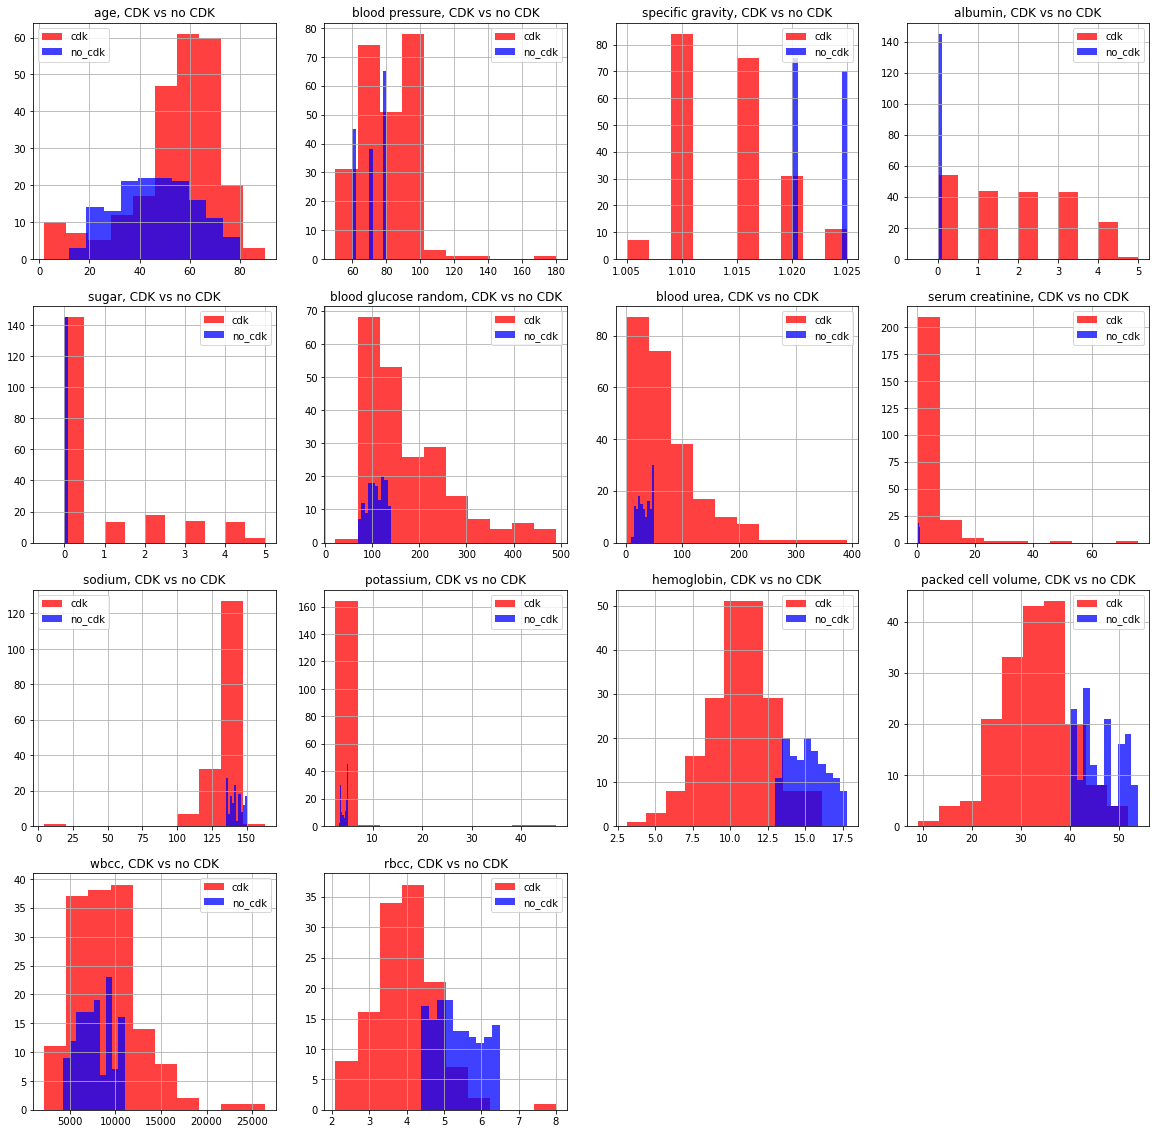

In [52]:
c = 1
plt.figure(figsize=(20,20))
for i in cdk_numerical:
    plt.subplot(4, 4, c)
    colors = {'cdk': 'red', 'no_cdk': 'blue'}
    labels = list(colors.keys())
    c += 1
    cdk_numerical[i].hist(alpha=0.75, color=colors.get('cdk'))
    no_cdk_numerical[i].hist(alpha=0.75, color=colors.get('no_cdk'))
    plt.title(f'{i}, CDK vs no CDK')
    plt.legend(labels)
#plt.savefig('Numerical Features CDK vs no CDK.png')

In [53]:
# Immediately from the numerical data that we can gather from an individual, we can already tell a trend between those with CDK and those without

# this is assuming:
# both sets of collected data are on the same scales


---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

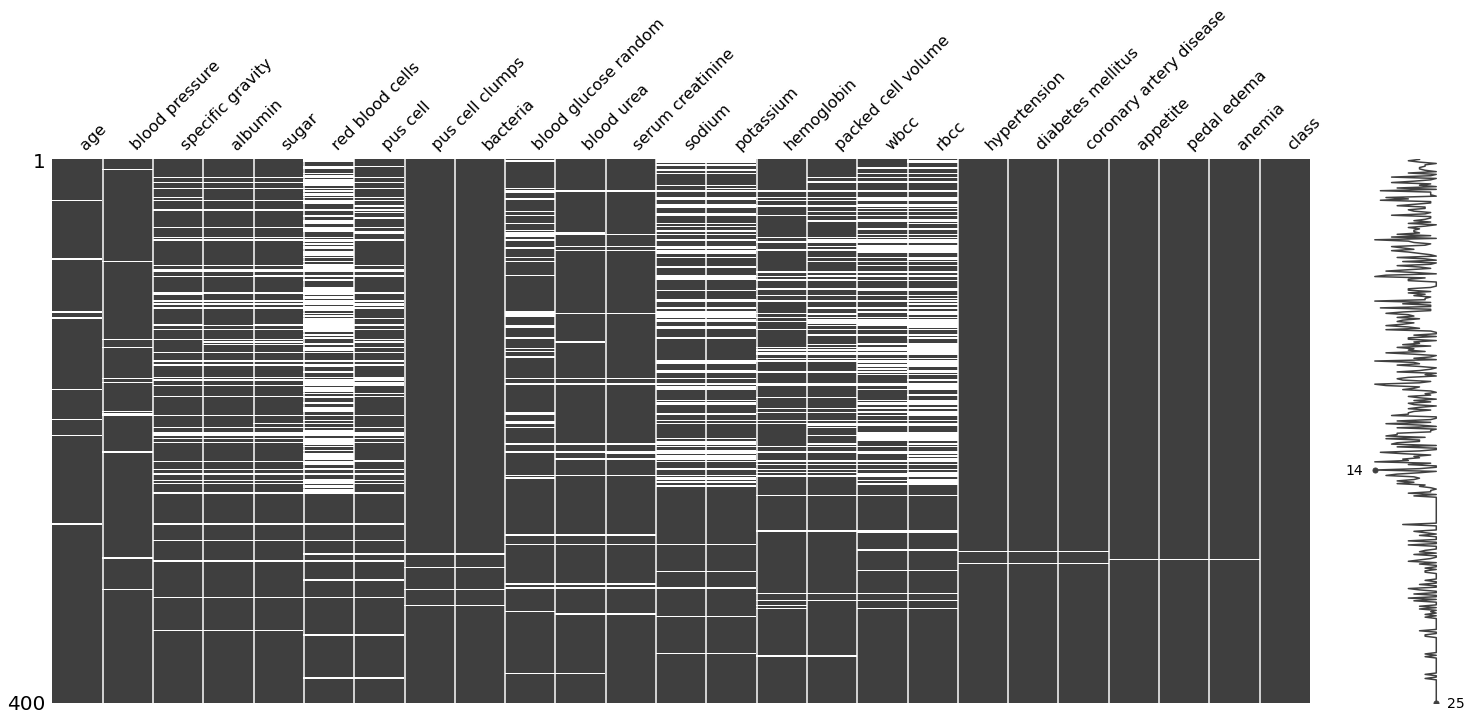

In [54]:
# Let's have a graphical look
msno.matrix(df_verbose);

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [55]:
df_verbose_complete = df_verbose.dropna()

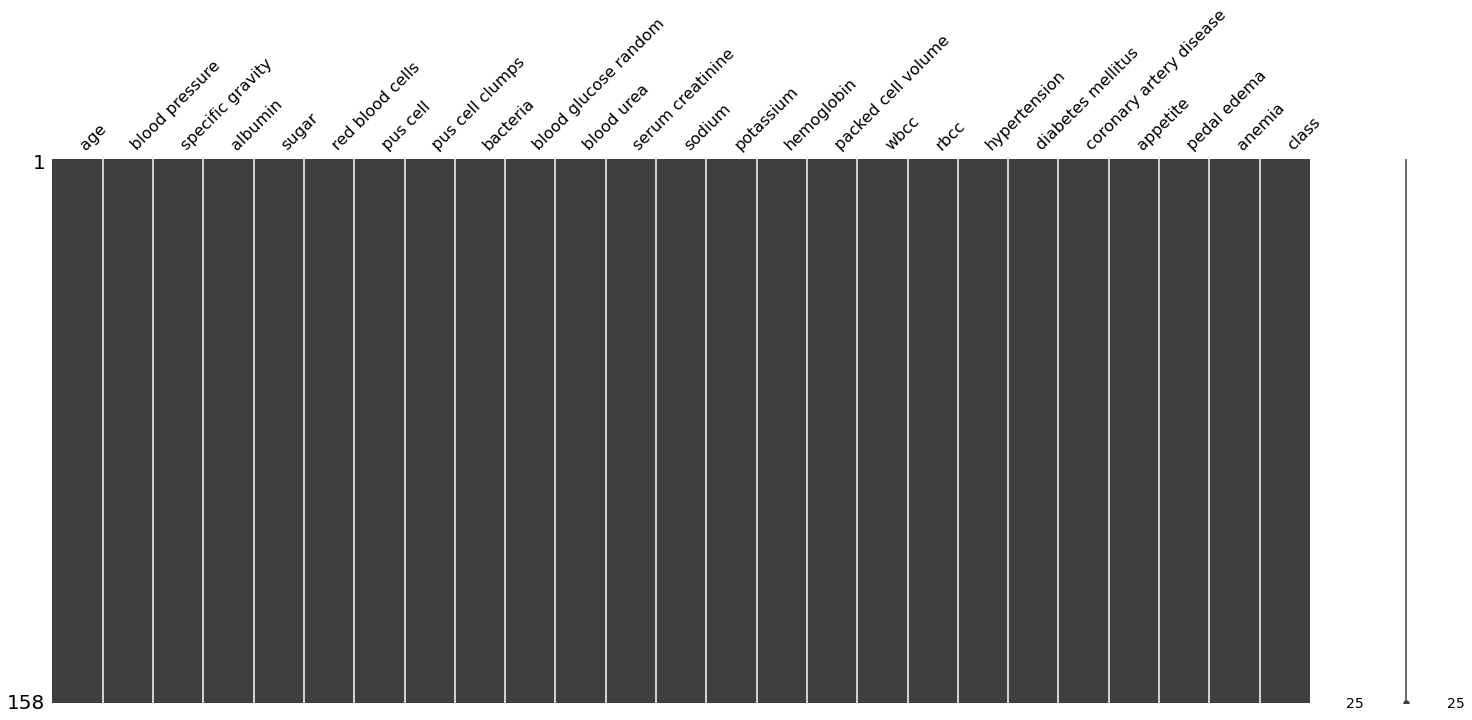

In [56]:
msno.matrix(df_verbose_complete)

Answer:

In [58]:
# We have lost over 300 data entires, 75% of the data was removed

# We have a few downsides:
# 1. much less data, we had an okay dataset of 400 individuals, enough of a sample to generalize to paitents who are suspected to havfe CDK
# However now, we have 150 data points, though complete, we have a subset of a population
# the issue with is is that we are now using a subset of a sample to generalize to a whole population of individuals who may be at risk of CDK

# 2. By omitting null entries, we may have accidently removed a subset of the population that could help us model signs of CDK. There may be a correlation with 
# not collecting data on the paitent and the paitent being high risk - with no need to test because they may have had some type of organ failure
# In that instance, no test is needed to know that this specific paitent has CDK. Let's check out the null data with CDK to check my hypothesis

In [62]:
cdk_null = cdk.isnull().sum()

In [66]:
no_cdk_null = no_cdk.isnull().sum()

In [77]:
pd.concat([cdk_null, no_cdk_null], axis=1).rename(columns={0:'CDK null',1:'no CDK null'})

,CDK null,no CDK null
age,8,1
blood pressure,10,2
specific gravity,42,5
albumin,41,5
sugar,44,5
red blood cells,143,9
pus cell,56,9
pus cell clumps,0,4
bacteria,0,4
blood glucose random,38,6


In [76]:
# Immediately, we can see that my hypothesis for null data may be correct. Those with CDK tend to have less data because this paitent is in a more
# severe condition and required immediate medical treatment

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer:

In [78]:
# 1. The medical staff were in a rush to keep the paitent alive. attributes about a person do not matter when some type of organ failure is present

# 2. Looking at data collected, a paitent may be lying about their appetite to make the medical practioner feel better, and record the wrong categeorigal column

# 3. Packed cell volume is a direct measurment from lab work of the rbc in the test tube after the blood has been spun and shifted
#    because this is a manual measurment done, there is oppotunity for data inprecision here

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

Answer:

In [ ]:
# Let's create a null model where we say that no paitent ever will have CDK. The null model does not take into account any numerical or 
# categeorical features

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:

In [ ]:
# The confusion matrix is confusing, so I am reffering to this source for help:
# https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

# Let's see the 4 kinds of datapoints
# true positive, true negative (exactly as they sound)

# false positive, false negative: marked true but false, marked false but true


# Okay, then in the instance of our null model for #6, we were optimizing for anyone who would have any condition, but they would always be marked false

# We are optimizing for false positives, who are actually negative for CDK.

# In this instance, it is financially efficent to estimate that our paitents do not have CDK, because it means then we do not have to handle paitents
# who might have it, - but also bring down mis-identifying conditions

# However, our casualty rate per paitent may raise - a terrible metric to be associated with a medical facility

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer:

In [79]:
#  our casualty rate per paitent may raise - a terrible metric to be associated with a medical facility

# A disproportionate amount of paitents who tested negative for CDK but actually have signs of CDK are more likely to die from complications of untreated CDK

### 9. Suppose that I want to construct a model where a person who does not have CKD will be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer:

In [80]:
# This is the opposite of #6, where the null model predicts every paitent will have CDK, whether or not they have the pre-existing conditions

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:

In [ ]:
# for #9, we are now minimizing for false positives, where those who actually have CDK are diagnosed as not having CDK.

# In our null model, we avoid all instance of false positives and ensure all paitents are checked for CDK

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer:

In [ ]:
# This is extremely expensive and may lead to unnecessary, complicated medical procedures as well as un-needed medicine - inefficent utilization of the 
# resources of the medical facility

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

Remember to do a train/test split. We suggest using GridSearchCV and pipelines.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [110]:
logr = LogisticRegression()

In [111]:
# I love building a baseline model where I enter every single piece of information to see what happens, then by feature optimization I can see how my model may improve

In [112]:
# I'm going to bring in my preprocessing parameter from my models.py that I am developing for Project 02. I can easily build pipelines in here to deal with both
# categeorical and numerical data

In [113]:
# I'm going back to the shorthand numerical data for my analysis and fitting
X = df.drop('class', axis=1)
y = df['class']

In [114]:
import models as model

In [115]:
# Instantiate my class by inputting X and y, and it has its own train-test-split attributes I will use throuhout
ms = model.ModelSelection(X, y)

In [116]:
# Let's go ahead and build a pipeline with the preprocessing attribute and a logisitic estimator which I instantiated above

In [117]:
# Let's make a baseline, no model optimization, no hyperparameter optimization via GridSearchCV, let's see what we can do by itself

In [118]:
pipe = ms.make_pipe(ms.preprocessing,[logr])

In [119]:
# alright cool, we have our model, let's see a graphical display because pictures are worth a thousand words

In [120]:
from sklearn import set_config
set_config(display='diagram')
pipe[0]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f39a52b50>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('cat_onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('cat_scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f39a529d0>)])),
                ('logisticregression', LogisticRegression())])

In [121]:
set_config(display='text')

In [122]:
# Let's fit our object and then return a score

In [123]:
scores, objects = ms.evaluate_pipes(pipe)

In [124]:
scores

[1.0]

In [125]:
# Okay wow, we got an accuracy of 100% on the training data. That is worrying

In [126]:
pipe[0].score(ms.X_test, ms.y_test)

1.0

In [127]:
# Let's do a comparison with cherry picked features

In [129]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
# X = Specific Gravity of Urine, Serum Creantine, Prescense of Low Oxygen in blood (anemia), hypertension
# y = CDK

# Justification
# https://www.kidney.org/atoz/content/about-chronic-kidney-disease

'''
You may develop complications like high blood pressure, anemia (low blood count), 
weak bones, poor nutritional health and nerve damage. Also, 
kidney disease increases your risk of having heart and blood vessel disease. 

may be caused by diabetes, high blood pressure and other disorders
''';

# I chose the specific gravity of urine because that is an immediate sign to how the kidneys are preforming, and if there is enough water being processed
# If the SG of the urine is higher than water, we may have an issue of the kidneys not properly filtering out

# Creatine Test, this is a numerical indicator that directly represents the conditions of your kidneys
# Creatine us a chemical waste product produced by muscle metabolism
# If there is an issue with the kidneys, creatine may accumulate in the blood and not in the urine

# Anemia. This is a long term inidicator which may come up before these signs of kidneys because of the importance of blood in body homeostasis
# If we can detect anemia early on, we can watch the paitent to see if their signs improve with a reinforced iron diet
# If the paitent is still anemia, I would recommend additional medical attention

# Hypertension, this is another long term inicator which may indicate stress in life. Because of the importance of blood, increased blood pressure
# may start leading to other chronic or dehibilitating symptoms such as, but not limited to: heart disease, liver failure, and kidney failure
# Over time, hypertension will destory the capallaries in the blood in blood rich locations such as the lungs, kidneys, liver

# I believe I have cherry picked a simple logistic regression that can be written into a script for use at a medical facility to see if 
# a paitent requires additional attention

In [130]:
X = df.loc[:, ['sg', 'sc', 'ane', 'htn']]
y = df['class']

In [131]:
ms = model.ModelSelection(X, y)
logr = LogisticRegression()
pipe = ms.make_pipe(ms.preprocessing,[logr])

In [132]:
scores, objects = ms.evaluate_pipes(pipe)

In [133]:
scores

[0.95]

In [134]:
# Our linear model detected with a 95% accuracy on the test data. I was afraid of the previous model overfitting, and am much more confident
# at the findings of this logistic model with selected numerical and categeorical features

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [138]:
df.loc[:, ['sg', 'sc', 'ane', 'htn', 'class']].head()

,sg,sc,ane,htn,class
0,1.020,1.2,no,yes,ckd
1,1.020,0.8,no,no,ckd
2,1.010,1.8,yes,no,ckd
3,1.005,3.8,yes,yes,ckd
4,1.010,1.4,no,no,ckd


In [180]:
pipe[0].named_steps.columntransformer.transform(ms.X_train)

array([[ 0.53817263, -0.31172469,  0.        , ...,  0.        ,
         2.06376969,  0.        ],
       [ 1.50468675, -0.44327982,  0.        , ...,  0.        ,
         2.06376969,  0.        ],
       [ 0.53817263, -0.42683543,  0.        , ...,  0.        ,
         2.06376969,  0.        ],
       ...,
       [-1.3948556 , -0.16372518,  0.        , ...,  0.        ,
         0.        ,  2.06744192],
       [-0.42834148, -0.09794762,  0.        , ...,  0.        ,
         2.06376969,  0.        ],
       [-1.3948556 , -0.27883591,  0.        , ...,  0.        ,
         2.06376969,  0.        ]])

In [181]:
# We can interpert this as ane yes, ane no, htn yes, htn no, class yes, class no

# translating for us to understand, our data has been one hot encoded

In [135]:
# Let's interpret the cherry picked model
objects[0].named_steps.logisticregression.coef_

array([[ 2.73251557, -1.84538776,  0.24724555,  0.49273646, -0.5376281 ,
         0.19182846,  1.2847211 , -1.30987755]])

In [ ]:
# We know the item in index 0 relates to specific gravity

# There is a positive coefficent in place for specific gravity
# This is an expected change in specific gravity has a higher effect on the paitent dbeing diagnosed with CDK

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [ ]:
# Looking at our interpetation of the columns from #13, we can look at 

#ane yes,        ane no,     htn yes,    htn no,     class yes, class no
# 0.24724555,  0.49273646, -0.5376281 ,0.19182846,  1.2847211 , -1.30987755]

In [182]:
# We noticed that anemia has a factor of about 50 % in affecting whether or not the paitent is diagnosed with CKD

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:

In [183]:
# It's fast - amazingly fast. Throw in data and get a benchmark on classification

# Doing a cost benefit analysis for computation time vs results, these results give us data scientists as well as medical professionals clues to start heading in the right
# direction, especially where the information directly impacts the time people have to live - as well as the data scientist responsible for doing this model fitting

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [186]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [185]:
confusion_matrix(ms.y_test, pipe[0].predict(ms.X_test))

array([[55,  4],
       [ 1, 40]])

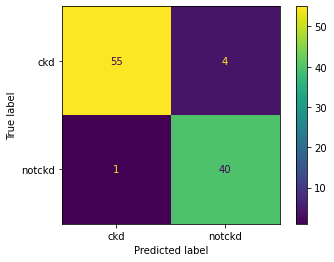

In [187]:
plot_confusion_matrix(estimator=pipe[0], X=ms.X_test, y_true=ms.y_test)

In [188]:
# Showing two variations of our confusion matirx. I would rather choose the graphical representation for easy interpertation

In [189]:
# This confusion matrix directly allows data scientists to evaluate their models to reduce the amount of false positives - in this medical application this is 

# greatly important

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer:

In [ ]:
# in the medical field, we will want to optimize for senstivity: proportion of positives that are correctly identified to all predictions

# We want to catch all of those who may have a previously undiagnosed, but chronic or severe condition

### 18. Plot the ROC Curve.

In [200]:
ms.y_test

103       ckd
279    notckd
91        ckd
104       ckd
58        ckd
        ...  
144       ckd
153       ckd
353    notckd
305    notckd
204       ckd
Name: class, Length: 100, dtype: object

In [225]:
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.preprocessing import LabelBinarizer


In [212]:
#binarize the y values
lb = LabelBinarizer()

In [213]:
y_roc = lb.fit_transform(ms.y_test)

In [216]:
y_roc[:5] # 0 = CDK, 1 != CDK

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [218]:
y_score_roc = pipe[0].predict_proba(ms.X_test)

In [223]:
cdk_score = [i for i, j in y_score_roc]

In [224]:
fpr, trp, roc_auc = roc_curve(y_roc, cdk_score)

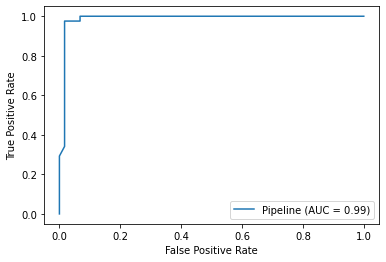

In [235]:
plot_roc_curve(estimator=pipe[0], X=ms.X_test, y=ms.y_test)

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

We'll leave that for another day!